<a href="https://colab.research.google.com/github/sandeepsamanth/Data-science-2024-from-scratch/blob/main/DAY_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
insurance = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vRa1wWwXmzxEvqITxj4OQTeLywlGTTsOTbhSRqKj2lPuGefjlci-DQhgLBPpgWXe8AAUu2WUBqY59X1/pub?gid=1030172542&single=true&output=csv")
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


Q-1: What is the probability distribution of age in the insurance dataset?

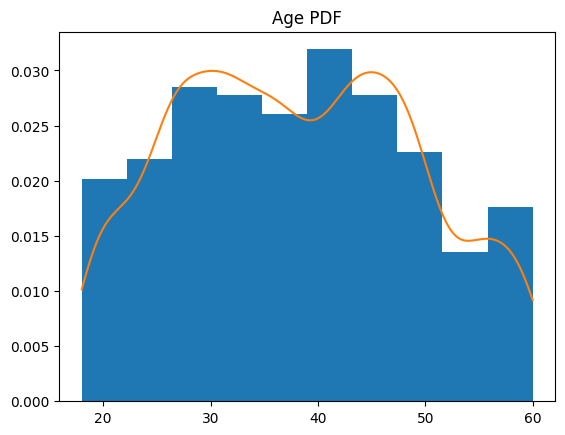

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

# Load data
df = insurance

# Plot histogram of age
plt.hist(df['age'], density=True)

# Fit KDE to age data
kde = KernelDensity(kernel='gaussian', bandwidth=2).fit(df['age'].dropna().to_numpy().reshape(-1, 1))

# Evaluate PDF over age range
age_range = np.linspace(df['age'].min(), df['age'].max(), 1000)
pdf = np.exp(kde.score_samples(age_range.reshape(-1, 1)))

# Plot PDF
plt.plot(age_range, pdf)
plt.title('Age PDF')
plt.show()

In [4]:
#Q-2: What is the probability of a patient having a BMI greater than 30?
bmi_greater_than_30 = insurance[insurance['bmi'] > 30]
probability_bmi_greater_than_30 = len(bmi_greater_than_30) / len(insurance)
print(probability_bmi_greater_than_30)


0.5216417910447761


<Axes: xlabel='claim', ylabel='Count'>

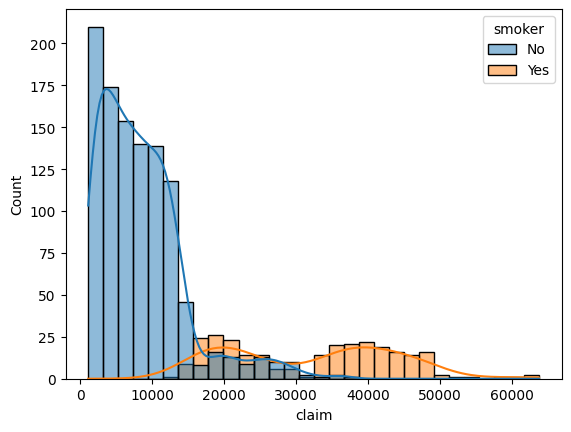

In [5]:
#Q-3: Plot distribution plot of claim for Smoker and non smoker. What changes you see in the plot?
sns.histplot(df, x='claim', kde=True, hue='smoker')


Claim for non smoker is lesser than smokers.
Most Claims of non smokers lies in range 0-15000, and Smoker's claims are greater than 15000


<Axes: xlabel='age', ylabel='claim'>

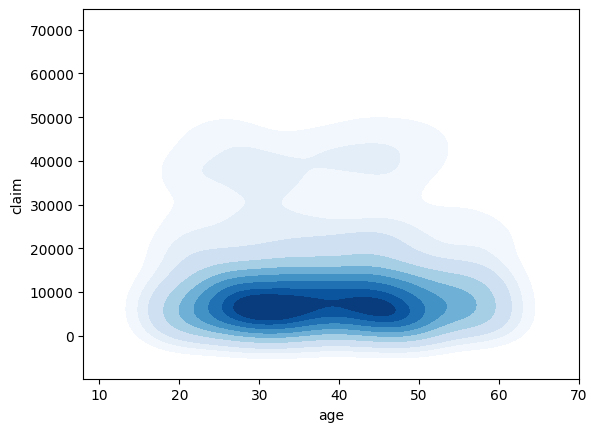

In [6]:
#Q-3: Plot the 2D probability density plot of claim and age in the insurance dataset?
sns.kdeplot(x=insurance['age'], y=insurance['claim'], cmap="Blues", thresh=0.05, fill=True)

<Axes: xlabel='claim', ylabel='Density'>

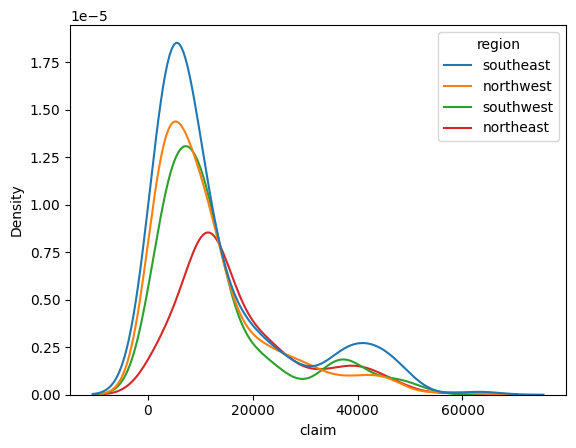

In [7]:
#Q-4: How does the disribution of claim changes for different region? Plot density plot and note down the observations
sns.kdeplot(df, x='claim',hue='region')


Leaving northeast, all other regions have high density around same claim amount.
All regions follow same trends of claims, global peak around 6000-10000 and a local peak around 4000

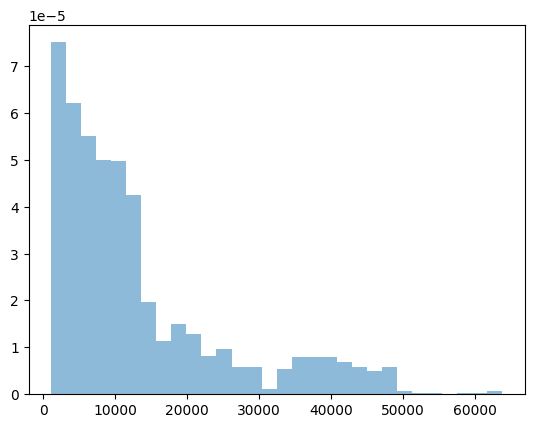

In [8]:
#Q5: Plot PDF and CDF of claim in insurance data
# Approach 1 - Histogram approach to which distribution follows
claim_data = insurance.claim
bins = 30  # Number of bins for histogram
density, bins, _ = plt.hist(claim_data, bins=bins, density=True, alpha=0.5)

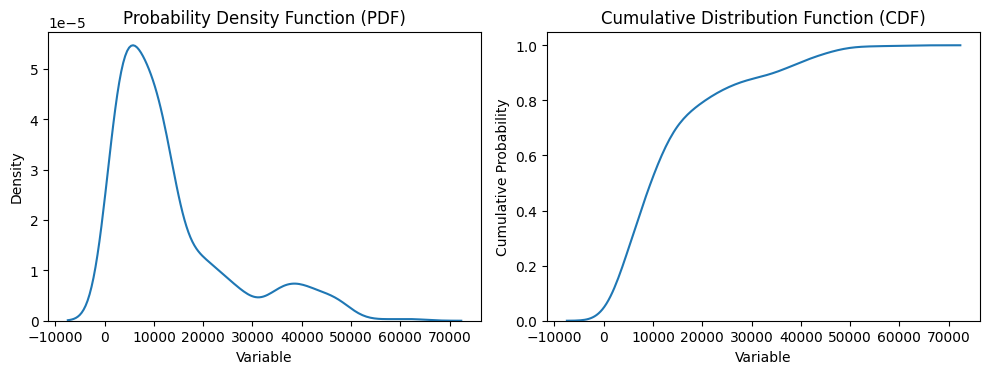

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate sample data (replace with your actual data)
data = claim_data


plt.figure(figsize=(10, 4))

# Plot PDF using KDE
plt.subplot(1, 2, 1)
sns.kdeplot(data)
plt.xlabel('Variable')
plt.ylabel('Density')
plt.title('Probability Density Function (PDF)')

# Plot CDF using cumulative sum of KDE
plt.subplot(1, 2, 2)
sns.kdeplot(data, cumulative=True)
plt.xlabel('Variable')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function (CDF)')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()
# NOn Parametric Approach